In [1]:
import os
import pandas as pd
import glob

import sys; sys.path.insert(0, "./utils/")
from data_utils import get_data_location, get_clinical_df, get_bluepoints_df

DATA_PATH = get_data_location()
print("Infered Data path:", DATA_PATH)

Infered Data path: /itet-stor/mrichte/covlus_bmicnas02/


In [2]:
clinical_data = get_clinical_df()

# As datetime, format is DD-MM-YYYY
clinical_data.adm_date = pd.to_datetime(clinical_data.adm_date, format="%d-%m-%Y")
# Rename Video ID to Patient ID
clinical_data.rename(columns={"Video ID": "Patient ID"}, inplace=True)

# Add bluepoint data
bp = get_bluepoints_df()

# Filter patients that don't have video data
clinical_id = clinical_data["Patient ID"]
bp_id = bp["Patient ID"]

# Filter all clinical id that are not in the bluepoints
clinical_data =  clinical_data[clinical_id.isin(bp_id)].reset_index(drop=True)

/home/mrichte/test_ma_repo/DL4LUS_Masterthesis/./utils/data_utils.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  bp["video_name"] = bp["Video file"].str.replace(".mp4", "")


In [3]:
age_col = "pat_birth_year"
gender_col = "pat_sex"
covid_col = "clin_diagn#COVID19_pneumonia"

In [4]:
# Number of male vs female
clinical_data[gender_col].value_counts()

1.0    41
0.0    22
Name: pat_sex, dtype: int64

In [5]:
# Number of patients with COVID-19
clinical_data[covid_col].value_counts()

1    33
0    30
Name: clin_diagn#COVID19_pneumonia, dtype: int64

Text(0, 0.5, 'Number of patients')

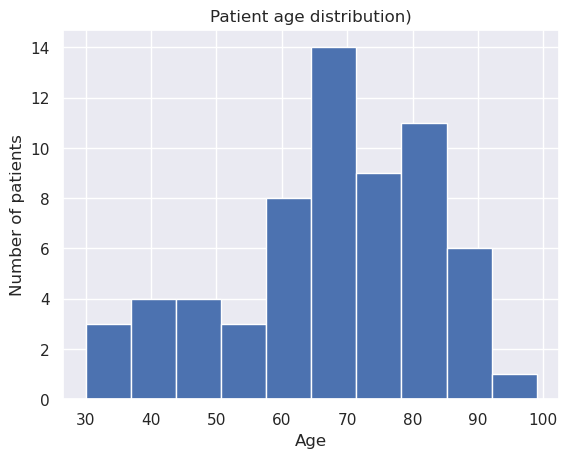

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
# Transform birth year to age
clinical_data["Age"] = 2023 - clinical_data[age_col]

# Age distribution
clinical_data["Age"].hist()
mean_age = int(clinical_data["Age"].mean())
plt.title(f"Patient age distribution)")
plt.xlabel("Age")
plt.ylabel("Number of patients")

(array([18659., 18673., 18687., 18701., 18718., 18732., 18748., 18762.]),
 [Text(18659.0, 0, '2021-02-01'),
  Text(18673.0, 0, '2021-02-15'),
  Text(18687.0, 0, '2021-03-01'),
  Text(18701.0, 0, '2021-03-15'),
  Text(18718.0, 0, '2021-04-01'),
  Text(18732.0, 0, '2021-04-15'),
  Text(18748.0, 0, '2021-05-01'),
  Text(18762.0, 0, '2021-05-15')])

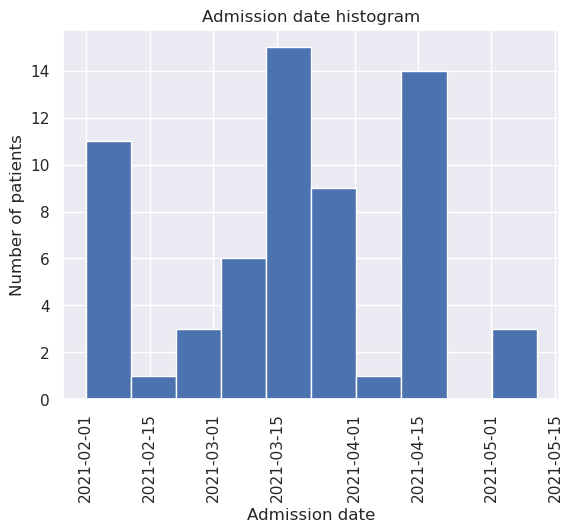

In [7]:
# Plot admission adm_date histogram
clinical_data["adm_date"].hist()
plt.title("Admission date histogram")
plt.xlabel("Admission date")
plt.ylabel("Number of patients")

# Rotate x-axis labels
plt.xticks(rotation=90)

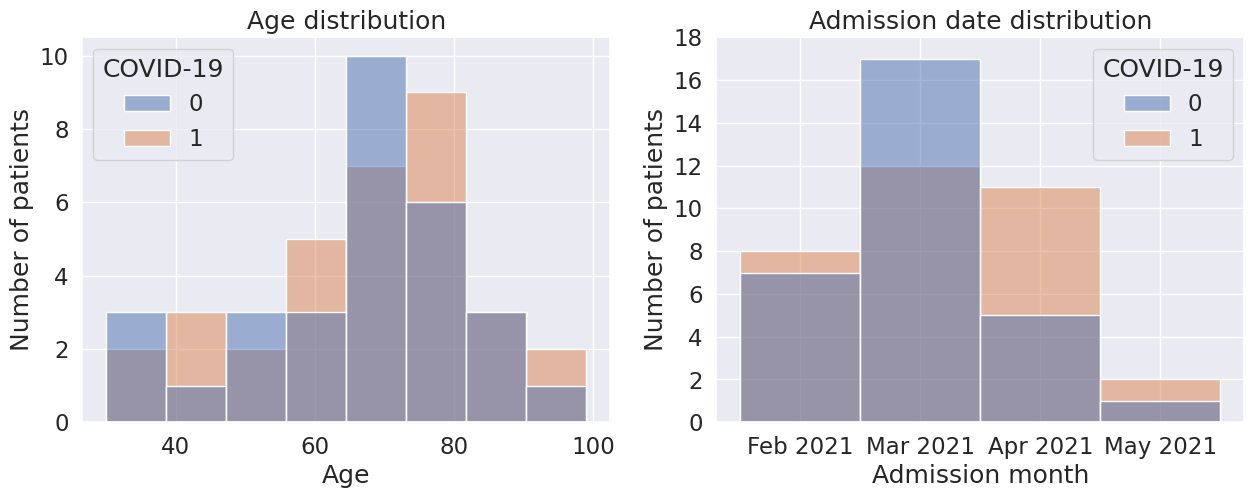

In [8]:
clinical_data["COVID-19"] = clinical_data["clin_diagn#COVID19_pneumonia"].copy()
sns.set(font_scale=1.5)
# Plot age distribution and admission date
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=clinical_data, x="Age", ax=ax[0], hue="COVID-19")
ax[0].set_title("Age distribution")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Number of patients")

# Plot admission date. One bar per month
# Group by month
clinical_data["adm_date_month"] = clinical_data["adm_date"].dt.to_period("M")
# Transform to Month name + Year
clinical_data["adm_date_month"] = clinical_data["adm_date_month"].dt.strftime("%b %Y")

sns.histplot(data=clinical_data, x="adm_date_month", ax=ax[1], hue="COVID-19")
ax[1].set_title("Admission date distribution")
ax[1].set_xlabel("Admission month")
ax[1].set_ylabel("Number of patients")
# Change y-axis to integer
ax[1].set_yticks(range(0, 20, 2))


# Save figure
#fig.savefig("/Users/matthiasrichter/Library/CloudStorage/OneDrive-Personal/Studium/Masterthesis/Thesis/Figures/Methods/age_and_adm_date.png")

plt.show()

In [9]:
# Adm date min and max
print("Admission date min:", clinical_data["adm_date"].min())
print("Admission date max:", clinical_data["adm_date"].max())

Admission date min: 2021-02-01 00:00:00
Admission date max: 2021-05-11 00:00:00


In [10]:
# Total number of videos
bp["video_name"].nunique()

371

In [11]:
bp.groupby("Patient ID").size().value_counts()

6    43
7    10
5     5
4     1
3     1
2     1
8     1
1     1
dtype: int64

In [12]:
pixel_count_path = os.path.join(DATA_PATH,"cropped_videos_segmented/post_processing")

# List all files & directories
files = os.listdir(pixel_count_path)

# keep only .csv files
csvs = [x for x in files if x.endswith(".gif_pixel_counts.csv")]

# Read all csvs into one dataframe
df = pd.concat((pd.read_csv(os.path.join(pixel_count_path, f)) for f in csvs))

In [ ]:
df